# **Punto 3**

## **Situación**

El conjunto de datos conocido como “California Housing Dataset” puede ser cargado del paquete sklearn. La variable objetivo es el valor medio de la vivienda para los distritos de California, expresado en cientos de miles de dólares ($100000). Este conjunto de datos se derivó del censo de EE.UU. de 1990, usando como unidad de censo el grupo de bloques. Un grupo de bloques es la unidad geográfica más pequeña para la que 
La Oficina del Censo de EE.UU. publica datos de muestra (un grupo de bloque generalmente tiene una población de 600 a 3000 personas).

Un hogar es un grupo de personas que residen dentro de una casa. Dado que el promedio. El número de habitaciones y dormitorios en este conjunto de datos se proporciona por hogar, estas columnas pueden tomar valores sorprendentemente grandes para grupos de bloques con pocos
hogares y muchas casas vacías, como centros vacacionales.

#### **3.1** Lea el conjunto de datos usando la función fetch_california_housing del paquete sklearn.datasets, guardelos en una variable llamada california_housing y con el comando print(california_housing.DESCR) observe la descripción general del dataset y en especial qué es cada una de las variables de entrada.

In [1]:
# Se cargan las librerías necesarias para abordar el problema

#### cargamos librerias a utilizar

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from numpy import arange
from scipy.stats import chi2
import scipy.stats as scp
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import ElasticNet
from sklearn.covariance import MinCovDet
from sklearn import datasets
import statsmodels.api as sm
import statsmodels.stats.api as sms
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_squared_error       
from sklearn.model_selection import train_test_split   
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy.stats import ttest_1samp

In [2]:
#Se procede a cargar el conjunto de datos

from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing()


print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

Segun la información proporcionada, se revisan de forma detallada las variables:

**MedInc (Mediana del ingreso por bloque):** 

Esta variable actúa como un indicador del poder adquisitivo de las personas que viven en cada uno de los bloques. Por tanto, se prevee que influya en el precio medio de la vivienda. 

**HouseAge (Mediana de la edad de la vivienda por bloque):**

Se espera que sea una variable que influya en el precio medio de la vivienda, pues la antiguedad de un inmueble evidentemente influye sobre dicha variable.

**AveRooms (Promedio de habitaciones por hogar en cada grupo de bloques):**

Podría actuar como una aproximación al tamaño de la vivienda, una características que puede influir en el precio de la vivienda. 

**AveBedrms (Promedio de dormitorios en cada grupo de bloques):**

Podría actuar como una aproximación al tamaño de la vivienda, una características que puede influir en el precio de la vivienda. 

**Population:**

Se refiere a la población que compone el bloque

**AveOccup (promedio de miembros del hogar):**

Esta variable da indicaciones de la densidad de las viviendas que componen los bloques.

**Latitude y Longitude:**

Cifras que indican la ubicación geográfica del bloque.


Es importante mencionar que para este conjunto de datos específicos se cuenta con información disponible para **20.640** bloques en California, para cada uno de ellos se cuenta con información para los atributos mencionados en la salida. No obstante a lo largo del desarrollo se hará una indagación de la estructura del data set. 



#### **3.2** Separe las variables explicativas X de la variable respuesta Y, para acceder a ellas use los comandos california_housing.data y california_housing.target. Considere la conveniencia de incluir las variables Longitud y Latitud al modelo. Haga un análisis exploratorio de las correlaciones entre las variables y comente al respecto.

In [3]:
# Llevamos a cabo la sepración de la información 

#Variables predictoras 

X = california_housing.data

#Variable objetivo - Etiquetas

Y = california_housing.target



Se convierten los atributos y la variable objetivo en un Data Frame, esto se realiza con el objetivo de llevar a cabo el análisis exploratorio.

In [4]:
df_X = pd.DataFrame(data=X, columns=california_housing.feature_names)

df_Y = pd.DataFrame(data=Y, columns=["median_house_value"])

Para poder trabajar la información completa y analizar posteriormente las correlaciones, concatenamos los dataframes de atributos y variable objetivo. 

In [5]:
df_complete = pd.concat([df_X, df_Y], axis=1)

df_complete.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,median_house_value
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Para poder manejar la información de la mediana del ingreso y el valor mediano de las viviendas, realizamos las siguientes operaciones:

- La mediana del ingreso está expresada en US 10.000 (según Kaggle)
- La mediana del valor de la vivienda está expresada US 100.000 (según la documentación) 

In [6]:
# Multiplicar la variable MedInc por 10,000
df_complete['MedInc'] = df_complete['MedInc'] * 100000

# Multiplicar la variable median_house_value por 100,000
df_complete['median_house_value'] = df_complete['median_house_value'] * 100000

In [7]:
df_complete.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,median_house_value
0,832520.0,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,452600.0
1,830140.0,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,358500.0
2,725740.0,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,352100.0
3,564310.0,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,341300.0
4,384620.0,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,342200.0


##### **Análisis Exploratorio**

In [8]:
df_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MedInc              20640 non-null  float64
 1   HouseAge            20640 non-null  float64
 2   AveRooms            20640 non-null  float64
 3   AveBedrms           20640 non-null  float64
 4   Population          20640 non-null  float64
 5   AveOccup            20640 non-null  float64
 6   Latitude            20640 non-null  float64
 7   Longitude           20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


**Análisis**:

Para el conjunto de datos California Housing, se identificaron un total de 20.640 registros que corresponden a la información de los grupos de bloques identificados en el censo de 1990 realizado en Estados Unidos. Se destaca que en la base de datos no se identifican valores nulos, adicionalmente, todas las variables (predictoras y objetivo) son de tipo numérico.

In [9]:
#Llevamos a cabo un análisis descriptivo de las variables

from scipy.stats import skew, kurtosis 

def tabla_descriptivas_completa (columnas):

    tabla_descriptivas_completa=pd.DataFrame(columnas.describe())
    tabla_descriptivas_completa.loc['coef. variation']=columnas.std()/columnas.mean()
    tabla_descriptivas_completa.loc['skew']=skew(columnas)
    tabla_descriptivas_completa.loc['kurtosis']=kurtosis(columnas)

    return tabla_descriptivas_completa

In [10]:
tabla_descriptivas_completa(df_complete)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,median_house_value
count,2.064000e+04,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671e+05,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,206855.816909
std,1.899822e+05,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,115395.615874
min,4.999000e+04,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,14999.000000
25%,2.563400e+05,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,119600.000000
50%,3.534800e+05,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,179700.000000
75%,4.743250e+05,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,264725.000000
max,1.500010e+06,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,500001.000000
coef. variation,4.908249e-01,0.439448,0.455733,0.432134,0.794444,3.382356,0.059945,-0.016756,0.557855
skew,1.646537e+00,0.060326,20.696365,31.314680,4.935500,97.632465,0.465919,-0.297780,0.977692


**Análisis**

- Inicialmente, observamos que la mediana de los ingresos evidencia una variación significativa, pues el valor mínimo identificado para los bloques censados es de US 4.999 y el valor máximo de US 150.001. Es decir, hay una brecha importante entre los diferentes bloques censados, que puede influir en el valor de las viviendas.

- Con respecto a la antiguedad de las viviendas, se encontró que la edad mediana promedio está cercana a los 29 años. 

- Con respecto a las personas que habitan en los bloques censados, se encontró que la población promedio es de aproximadamente 1.425 personas.

- Para esta variable se identificó que el 75% de los bloques tienen una población de hasta 1.725 personas, pero por otra parte se observa que el valor máximo de población para un bloque es de 35.682. Es decir, que es probable de que existan varios bloques con viviendas desocupadas.

- Finalmente, con respecto a la variable objetivo se encontró que el valor medinao de las viveindas varía entre US 14.999 y US 500.001, lo que podría reflejar una alta diversidad en los precios de los inmuebles en los diferentes puntos censados de California.

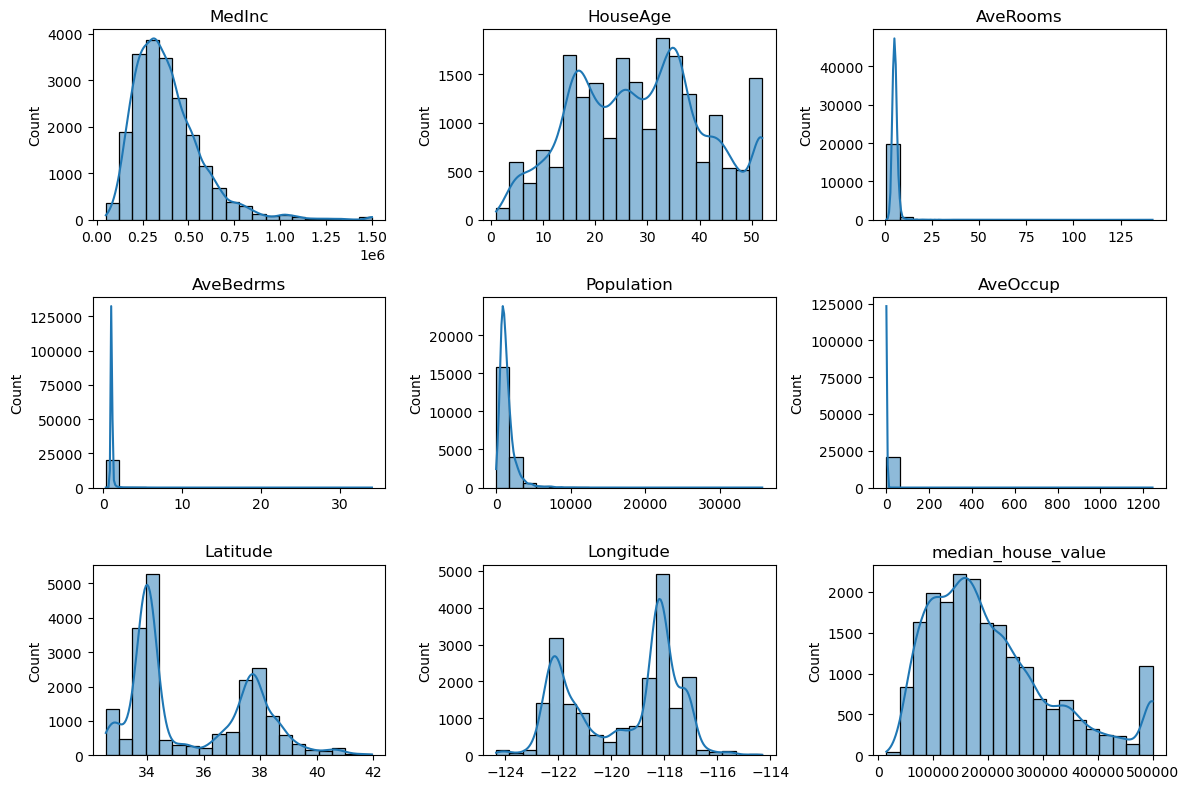

In [11]:
#Procedemos a realizar el análisis gráfico de las variables asociadas al Dataset

'''Histogramas'''

# Configuración del diseño del gráfico

plt.figure(figsize=(12, 8))
plt.subplots_adjust(hspace=0.5)

# Configuración de los histogramas para cada variable del Dataset

for i, column in enumerate(df_complete.columns):
    ax = plt.subplot(3, 3, i + 1)
    sns.histplot(df_complete[column], kde=True, bins=20, legend=False, ax=ax)
    ax.set_xlabel('') 
    plt.title(column)

plt.tight_layout()
plt.show()


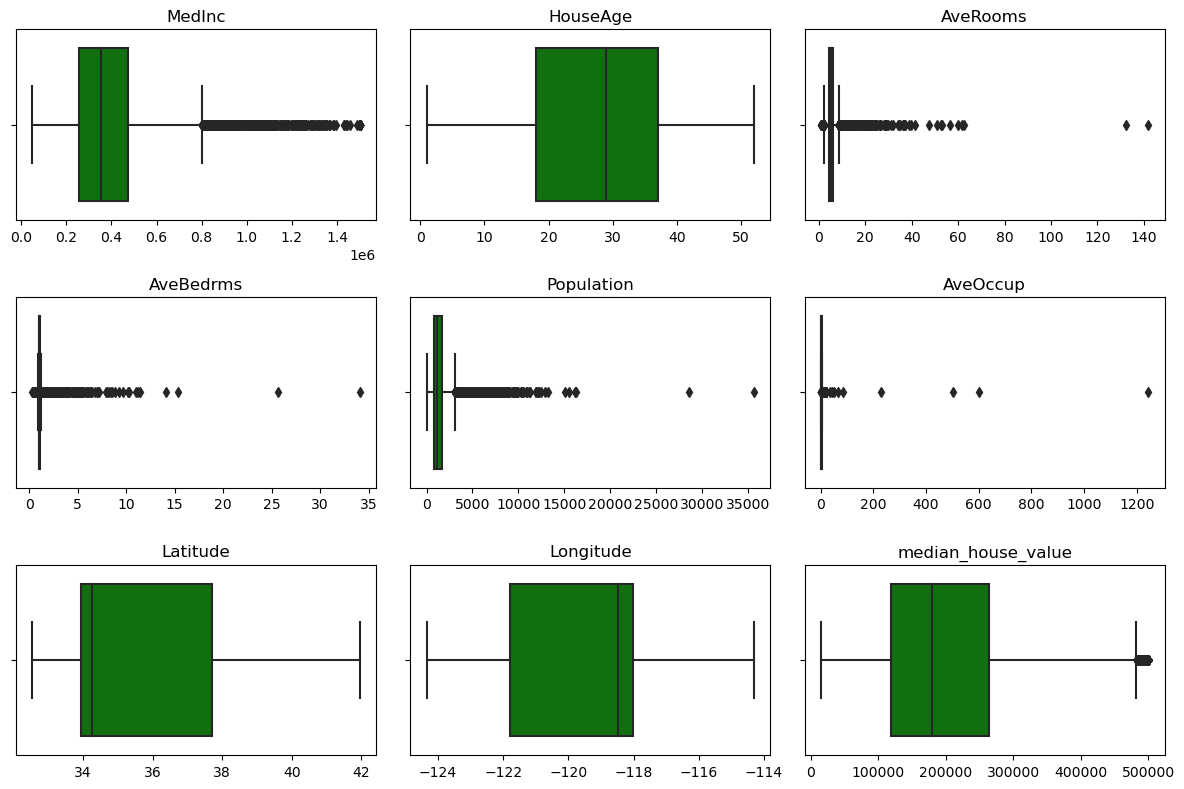

In [12]:
'''Boxplot'''

# Configuración del diseño del gráfico
plt.figure(figsize=(12, 8))
plt.subplots_adjust(hspace=0.5)

# Configuración de los boxplots para cada variable del Dataset
for i, column in enumerate(df_complete.columns):
    ax = plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df_complete[column], orient='h', color='green', ax=ax)
    ax.set_xlabel('') 
    plt.title(column)

plt.tight_layout()
plt.show() 

**Análisis**

Se mencionan algunos de los resultados obtenidos a través del análisis gráfico: 

- Con respecto a la distribución de la mediana del ingreso de los bloques se observa un sesgo hacia la derecha (positivo), explicado por el comportamiento y el coeficiente de simetría. Este resultado, sugiere una concentración de los valores de los ingresos hacia la izquierda de la distribución.

- La distribución de la mediana de la edad de la vivienda, evidencia entre el conjunto de datos una de las variables que demuestra la menor dispersión, a pesar de no tener una forma normal, es la única que no demuestra la presencia de outliers importantes. Adicional a esto, el resultado del coeficiente de simetría (0.06) indica una cercanía a un comportamiento simétrico. 

- En relación con el número promedio de las habitaciones, dormitorios, la población y el promedio de los miembros del hogar, se encontraron distirbuciones que evidencian una variabilidad muy alta en los datos de dichos atributos, explicada por la gran cantidad de datos atípicos que exhiben. 

- Finalmente, con respecto a la mediana del valor de la vivienda se evidencia un sesgo hacia la derecha de la distirbución, lo cuál significa que la mayoría de los bloques censados evidencian valores medianos de la vivienda bajos.


c:\Users\monte\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


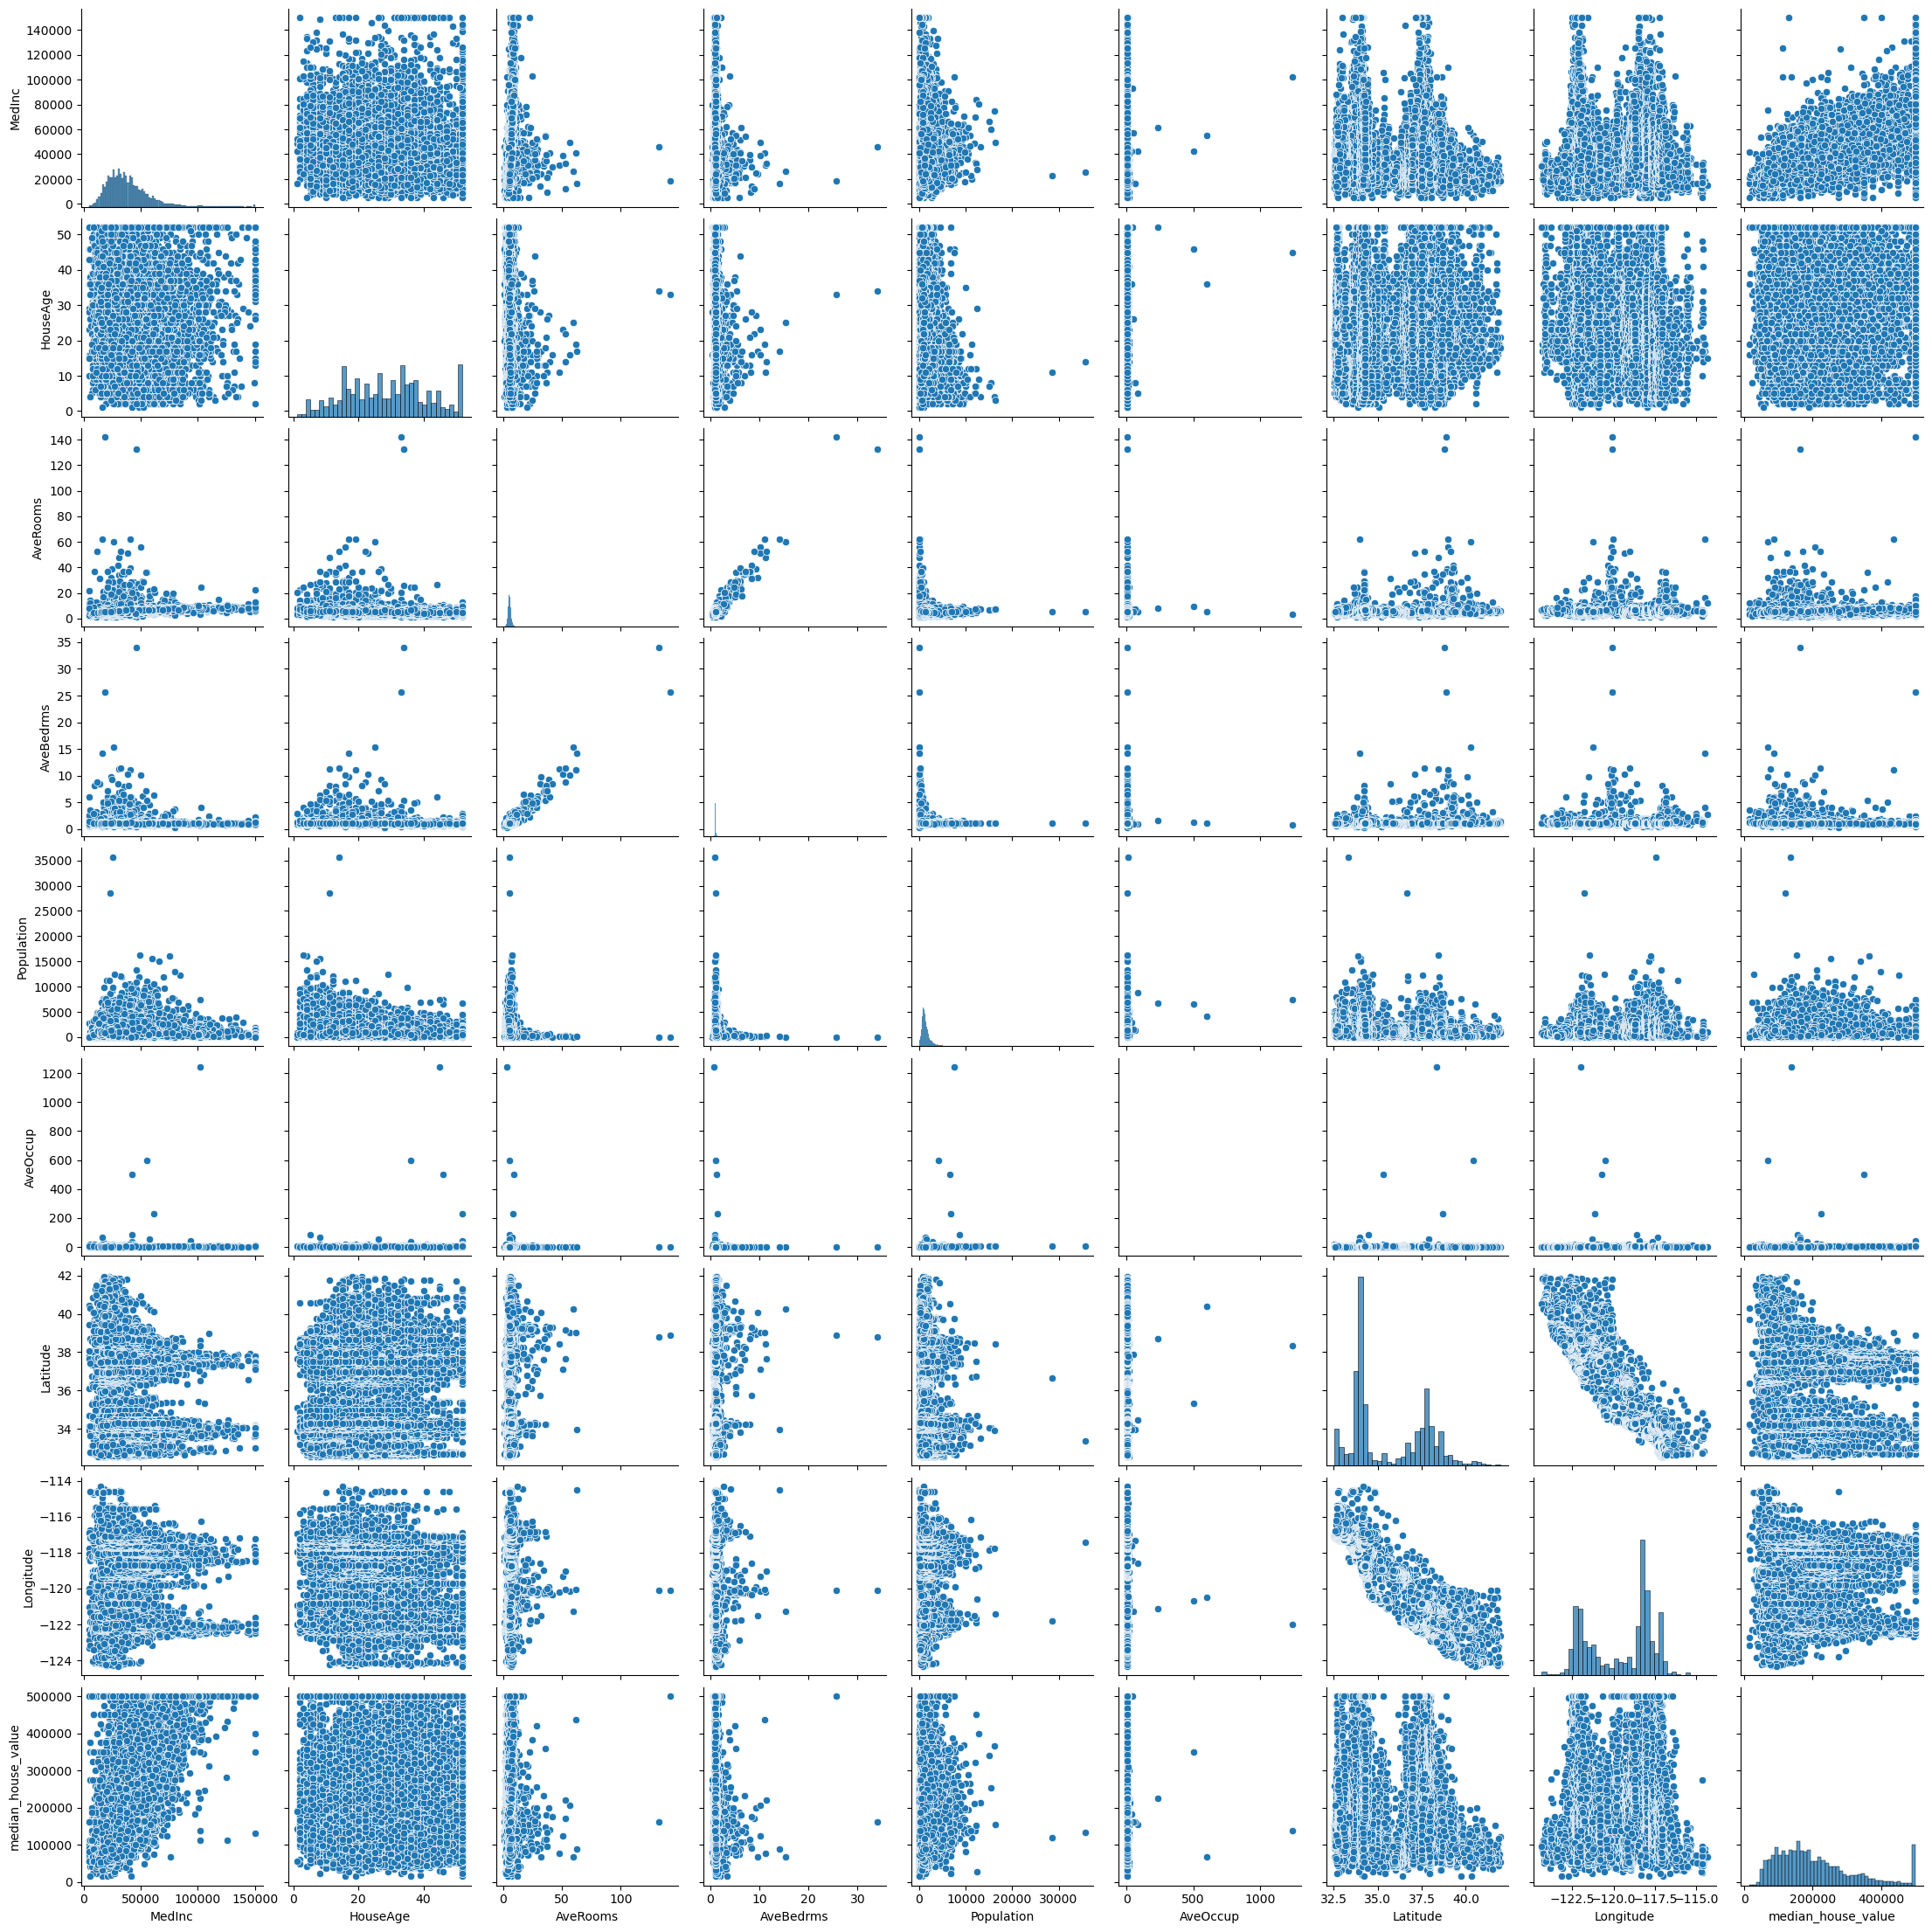

In [13]:
'''A continuación, se llevará a cabo una análisis de dispersión entre las variables 
predictoras y la variable objetio. Asi como, un análisis enfocado en revisar las 
correlaciones que presentan las características de la base de datos'''"Solución Examen 2 - DC v2.ipynb"


sns.pairplot( df_complete)

In [13]:
'''Matriz de Correlación'''

correlation_matrix = df_complete.corr()
print(correlation_matrix)

                      MedInc  HouseAge  AveRooms  AveBedrms  Population  \
MedInc              1.000000 -0.119034  0.326895  -0.062040    0.004834   
HouseAge           -0.119034  1.000000 -0.153277  -0.077747   -0.296244   
AveRooms            0.326895 -0.153277  1.000000   0.847621   -0.072213   
AveBedrms          -0.062040 -0.077747  0.847621   1.000000   -0.066197   
Population          0.004834 -0.296244 -0.072213  -0.066197    1.000000   
AveOccup            0.018766  0.013191 -0.004852  -0.006181    0.069863   
Latitude           -0.079809  0.011173  0.106389   0.069721   -0.108785   
Longitude          -0.015176 -0.108197 -0.027540   0.013344    0.099773   
median_house_value  0.688075  0.105623  0.151948  -0.046701   -0.024650   

                    AveOccup  Latitude  Longitude  median_house_value  
MedInc              0.018766 -0.079809  -0.015176            0.688075  
HouseAge            0.013191  0.011173  -0.108197            0.105623  
AveRooms           -0.004852  0.1

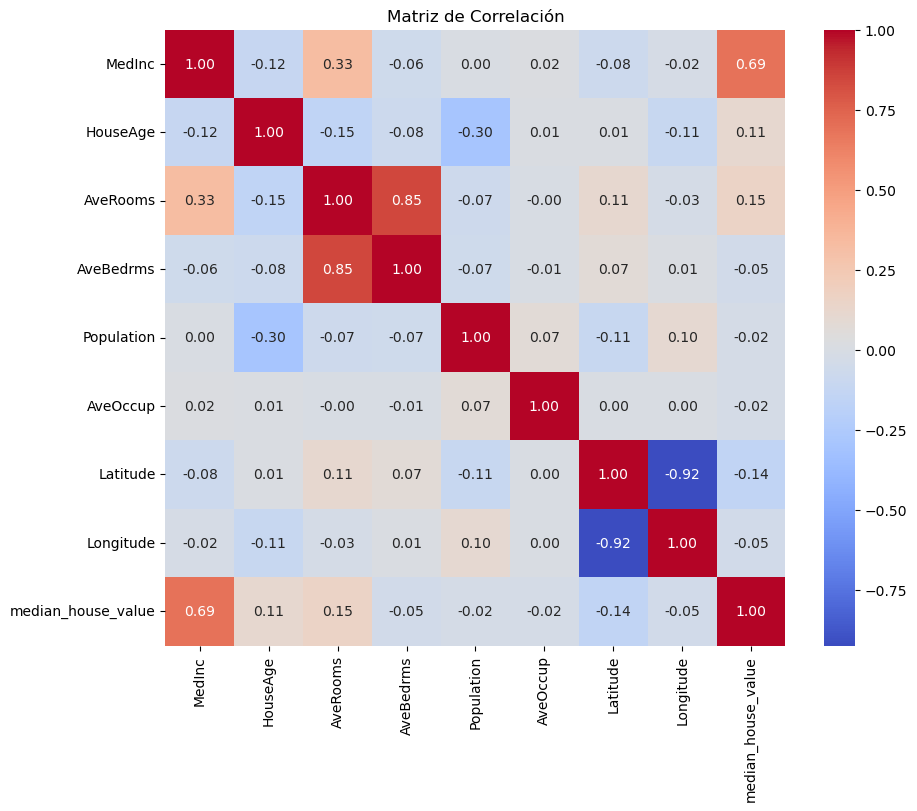

In [14]:
'''Mapa de calor'''


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

**Análisis** 

En este caso la matriz de correlación nos da algunos indicios de cuáles son las variables que pueden influir de forma importante en la mediana del valor de las viviendas. Para el ejercicio, se encontró que la correlación más alta frente a la variable objetivo la evidencia la mediana del ingreso (0.69). 

Esto significa que ante aumentos en la mediana del ingreso en un bloque, la mediana del valor de la vivienda también aumentaría en dicho bloque.

Por su parte, si se analizan las correlaciones entre las variables predictoras se pueden destacar que la correlación entre Latitude y Longitude es de -0,92 lo que indica una correlación negativa bastante alta al ser variables asociadas a la ubicación geógrafica. Sin embargo, esta alta correlación exhibe un problema de multicolinealidad que puede generar problemas de precisión en los coeficientes del modelo. 

Por tanto, inicialmente se optará por utilizar Latitude en el modelo de regresión que se estimará más adelante, al ser la que evidencia la correlación mayor (frente a Longitude) con la varible objetivo.

##### **Regresión Lineal**

Teniendo en cuenta la información y el análisis correspondiente al EDA, se procede a estimar un modelo de regresión lineal utilizando Mínimos Cuadrados Ordinarios. 

In [15]:
X = df_X.drop(["Longitude"], axis=1)
y = df_Y

In [16]:
#Se añade una columna de 1's para poder tener el término independiente

X = sm.add_constant(X)

#Entrenamiento del modelo usando OLS 

model = sm.OLS(y,X)
results = model.fit()

#Resumen del modelo

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     3498.
Date:                Thu, 16 May 2024   Prob (F-statistic):               0.00
Time:                        19:24:57   Log-Likelihood:                -24167.
No. Observations:               20640   AIC:                         4.835e+04
Df Residuals:                   20632   BIC:                         4.841e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6855      0.100      6.853      0.0

**Análisis** 

A pesar de que el modelo anterior evidencia una significancia global explicada por el valor P asociado al estadístico F (0.00), que indicaría que el mismo es significativo en la explicación de la variabilidad en la mediana del valor de las viviendas, se observa un número de condición muy alto. 

Este último resultado, indica que hay una alta sensibilidad del modelo a pequeños cambios en los datos de las variables explicativas, el cual se debe a problemas de multicolinealidad en los datos. Como se observa en la matriz de correlación de los puntos anteriores, existen altas correlaciones entre el par de variables explicativas AveBdrms y AveRooms. 

Por tanto, es necesario considerar la implementación de alguna técnica que permita reducir el número de variables explicativas y, así, abordar la problemática de la multicolinealidad para mejorar la estabilidad del modelo. Una opción viable en este contexto es la regresión LASSO, que aplica una penalización a los atributos utilizados en un modelo específico.

#### **3.3** Ajuste un modelo de regresión LASSO con un coeficiente de penalización pequeño, iterativamente ajuste este valor para eliminar variables explicativas y corregir el problema de multicolinealidad, en cada iteración calcule las correlaciones de las variables explicativas y pare cuando no se encuentren correlaciones altas.

Antes de llevar a cabo el modelo de regresión LASSO procederemos a llevar a cabo un proceso de estandarización de las variables predictoras. Esto debido a que las mismas, pueden estar en diferentes escalas lo que puede generar un impacto en la magnitud de los coeficientes que el metódo estimaría. 

In [17]:
from sklearn.preprocessing import StandardScaler

# Inicializar el StandardScaler
scaler = StandardScaler()

# Aplicar la estandarización a las variables del DataFrame df_X
df_X_estandar = scaler.fit_transform(df_X)

# Convertir el resultado a un nuevo DataFrame
df_X_estandar = pd.DataFrame(df_X_estandar, columns=df_X.columns)

# Verificar el DataFrame estandarizado
print(df_X_estandar.head())

     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  2.344766  0.982143  0.628559  -0.153758   -0.974429 -0.049597  1.052548   
1  2.332238 -0.607019  0.327041  -0.263336    0.861439 -0.092512  1.043185   
2  1.782699  1.856182  1.155620  -0.049016   -0.820777 -0.025843  1.038503   
3  0.932968  1.856182  0.156966  -0.049833   -0.766028 -0.050329  1.038503   
4 -0.012881  1.856182  0.344711  -0.032906   -0.759847 -0.085616  1.038503   

   Longitude  
0  -1.327835  
1  -1.322844  
2  -1.332827  
3  -1.337818  
4  -1.337818  


In [18]:
X = df_X_estandar.drop(["Longitude"], axis=1)
y = df_Y

In [19]:
#Se añade una columna de 1's para poder tener el término independiente

X = sm.add_constant(X)

#Entrenamiento del modelo usando OLS 

model = sm.OLS(y,X)
results = model.fit()

#Resumen del modelo

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     3498.
Date:                Thu, 16 May 2024   Prob (F-statistic):               0.00
Time:                        19:25:04   Log-Likelihood:                -24167.
No. Observations:               20640   AIC:                         4.835e+04
Df Residuals:                   20632   BIC:                         4.841e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0686      0.005    380.779      0.0

In [20]:
'''Primero: 

Definimos el umbral que seleccionará las variables con coeficientes absolutos
mayores que dicho umbral. Se seleccionan las características que en la regresión
LASSO sean signtificativos en términos absolutos (mayores a la definición).

Comunmente se utiliza 0.01 o 0.05'''

threshold = 0.01

'''Segundo:

Definimos la secuencia en la cual se va a iterar sobre alpha. Este valor
determina el grado de penalización que realizará la regresión LASSO'''

alphas = np.arange(0.00001, 1, 0.01) #Valor inicial, valor final y tamaño del intervalo

'''Tercero:

Generamos la lista donde se almacenarán las matrices de correlación para cada
valor de alpha'''

matrices_correlacion = []

'''Cuarto:

Definimos el bucle para iterar sobre cada valor de alpha definido en el segundo punto'''


for alpha in alphas:

    lasso = Lasso(alpha=alpha)  #Inicialización del modelo LASSO con el valor de alpha actual
    lasso.fit(X, y)  #En este paso se ajusta el modelo LASSO
    
    coefficients = pd.Series(lasso.coef_, index=X.columns)  # Obtención de los coeficientes
    selected_features = coefficients[abs(coefficients) > threshold]  # Se seleccionan las características con coeficientes mayores al umbral 
    correlation_matrix = X[selected_features.index].corr()  # Calculo de la matriz de correlación para las características que se seleccionaron
    matrices_correlacion.append(correlation_matrix)  # Este paso agrega la matriz de correlación a la lista creada en tres

'''Quinto:

Se lleva a cabo las iteraciones sobre los valores de alpha y las matrices de correlaciópn que se generan en el paso anterior'''

for alpha, correlation_matrix in zip(alphas, matrices_correlacion):

    print("Alpha Evaluado:", alpha)
    print("Matriz de Correlación:")
    print(correlation_matrix)
    print("-------------------------------")
    print("-------------------------------")

Alpha Evaluado: 1e-05
Matriz de Correlación:
              MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc      1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge   -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms    0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms  -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population  0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup    0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude   -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   

            Latitude  
MedInc     -0.079809  
HouseAge    0.011173  
AveRooms    0.106389  
AveBedrms   0.069721  
Population -0.108785  
AveOccup    0.002366  
Latitude    1.000000  
-------------------------------
-------------------------------
Alpha Evaluado: 0.01001
Matriz de Correlación:
             MedInc  HouseAge  AveRooms  Av

**Análisis** 

El valor de alpha controla el nivel de regularización que se está aplicando al modelo, por tanto, a medida que aumenta el valor de alpha se evidencia una selección más rigurosa de características o variables predictoras. En este ejemplo, con un valor de alpha correspondiente a 0.02001 el modelo LASSO penaliza la variable Population, sin embargo, en esta tercera iteración sigue figurando una alta correlación entre AveBedrms y AveRooms, es decir, que no es el alpha optimo para proceder a estimar un modelo reducido. 

Dado lo anterior, observamos que con un alpha de 0.03001 el modelo penaliza la variable AveBedrms. En esta iteración desaparecen las correlaciones altas entre las variables predictoras, por tanto, es un indicio de cuáles carecterísticas debemos utilizar para el modelo reducido. Antes de realizar dicha estimación, se propone un análisis gráfico de la penalización que realiza a través de dichos valores de alpha:



In [21]:
# Modelo Lasso - Alpha 0.02001

lasso_uno = Lasso(alpha=0.02001)

lasso_uno.fit(X,y)


Lasso(alpha=0.02001)

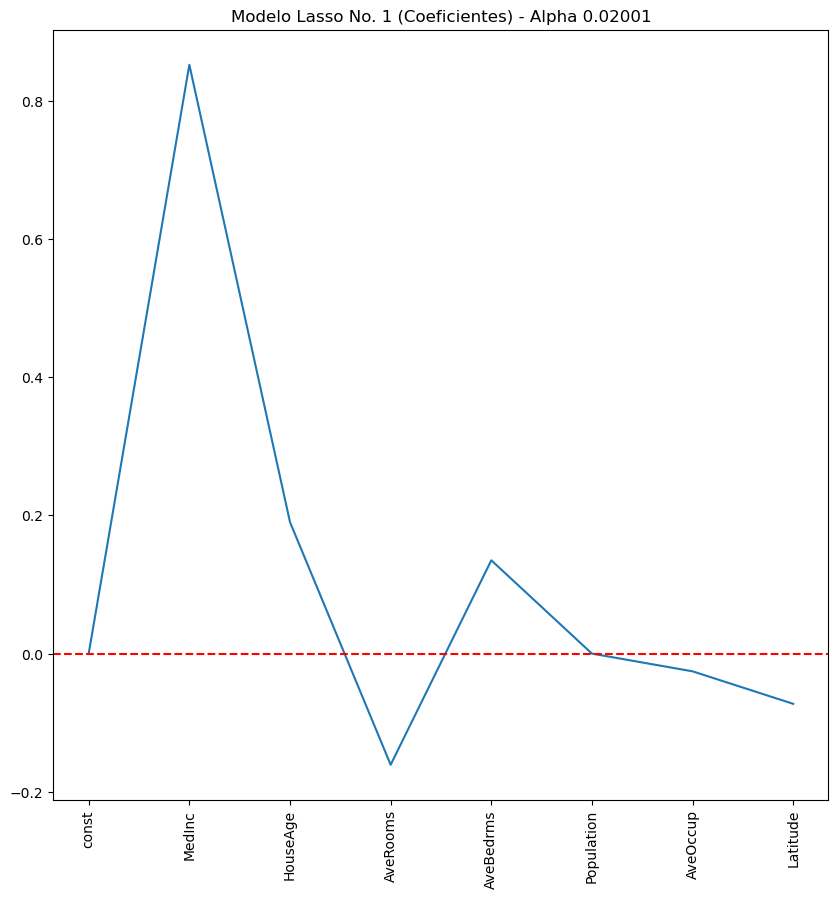

In [22]:
#Gráficamente

plt.figure(figsize=(10, 10))
plt.plot(X.columns, lasso_uno.coef_)
plt.axhline(y=0, color='red', linestyle='--') #Se plantea una línea roja en 0
plt.xticks(rotation=90)
plt.title("Modelo Lasso No. 1 (Coeficientes) - Alpha 0.02001")  
plt.show()



**Análisis**

A través del gráfico anterior, es posible observar cuáles son las características que prioriza el modelo y por supuesto aquellas que penaliza. En este caso, aquellos coeficientes que caen en la línea del 0, son aquellos que no se tienen en cuenta en el modelo debido a que tienen un efecto insignificante en las predicciones. Es importante tener en cuenta que el eje x de este gráfico está determinado por las variables predictoras mientras que el eje y, representa los coeficientes que asigna el modelo Lasso a cada una de dichas variables. 

In [23]:
# Modelo Lasso - Alpha 0.03001

lasso_dos = Lasso(alpha=0.03001)

lasso_dos.fit(X,y)

Lasso(alpha=0.03001)

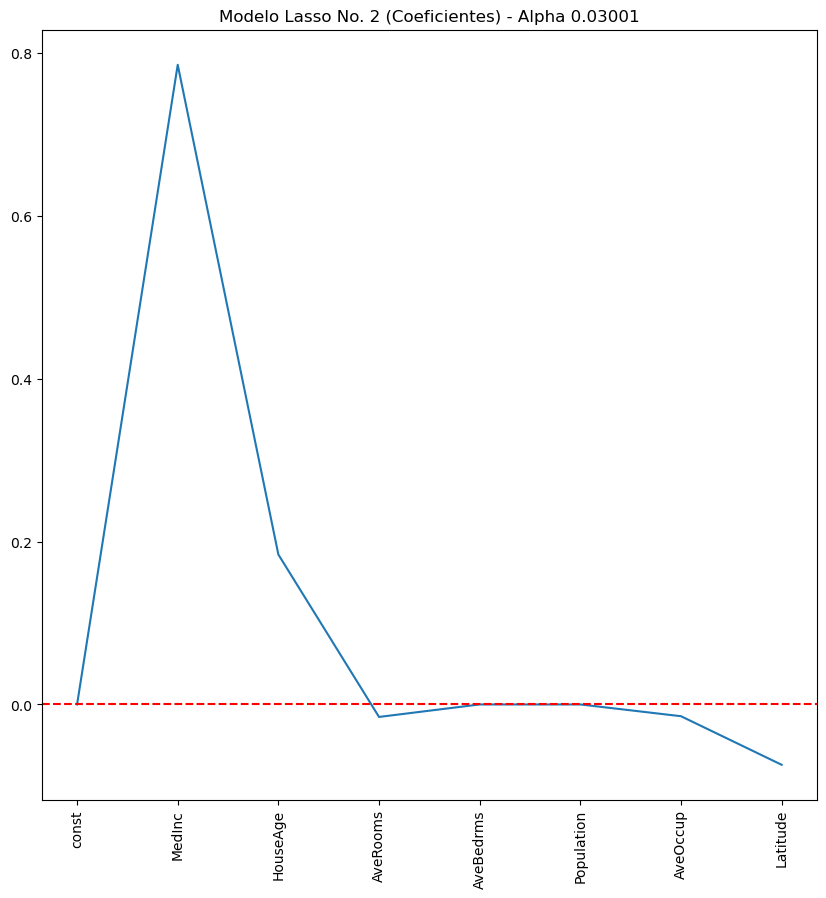

In [24]:
#Gráficamente

plt.figure(figsize=(10, 10))
plt.plot(X.columns, lasso_dos.coef_)
plt.axhline(y=0, color='red', linestyle='--') #Se plantea una línea roja en 0
plt.xticks(rotation=90)
plt.title("Modelo Lasso No. 2 (Coeficientes) - Alpha 0.03001")  
plt.show()


**Análisis**

Nuevamente, a través del gráfico podemos observar que con un alpha correspondiente a 0.03001 las variables AveBdrms y Population no deben ser consideradas en el modelo de regresión. Este resultado cobra sentido con respecto a la variable AveBdrms, la cual vimos en el análisis inicial presentaba una alta correlación con la variable AveRooms, un resultado que seguramente estaba generando los problemas de multicolinealidad identificados en la primera estimación del modelo por OLS. 

#### **3.4** Ajuste un modelo de regresión OLS con las variables reducidas y revise los residuales.

En este punto, teniendo en cuenta la información obtenida por el método de regularización de LASSO se estimará un modelo de regresión por OLS teniendo en cuenta las variables en sus niveles originales, es decir, sin estandarizar.

In [25]:
X_reduce = df_X.drop(["AveBedrms", "Population","Longitude"], axis=1)
y = df_Y

In [26]:
#Se añade una columna de 1's para poder tener el término independiente

X_reduce = sm.add_constant(X_reduce)

#Entrenamiento del modelo usando OLS 

model = sm.OLS(y,X_reduce)
results = model.fit()

#Resumen del modelo

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     4481.
Date:                Thu, 16 May 2024   Prob (F-statistic):               0.00
Time:                        19:25:49   Log-Likelihood:                -24655.
No. Observations:               20640   AIC:                         4.932e+04
Df Residuals:                   20634   BIC:                         4.937e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6340      0.096     17.039      0.0

**Análisis** 

Teniendo en cuenta la estimación anterior, podemos destacar varios puntos de la información obtenida: 

- Se observa una significancia global del modelo explicada por el valor F obtenido (Prob-F-statistic < 0.05)

- Todas las variables predictoras a excepción del intercepto evidencian un valor p menor a un nivel de significancia del 5%, por tanto se rechaza la hipótesis nula y es posible aseugrar que los coeficientes que acompañan a estas variables explicativas son significativos (MedInc, HouseAge, AveRooms, AveOccup y Latitude).

-  Se destaca de forma importante que el problema de multicolinealidad observado en el modelo original ya no hace parte del modelo reducido gracias al proceso de regularización realizado a través del modelo Lasso.

##### **Validación de los supuestos del modelo**

**Prueba de INDEPENDENCIA:**

A través del Test de Durbin-Watson se busca probar el supuesto de independencia, que plantea la siguiente prueba de hipótesis: 

- Ho: no hay autocorrelación de los errores del modelo 
- H1: existe autocorrelación entre los errores del modelo

La regla general para esta prueba plantea que valores del estadístico que se encuentren cercanos a 2 (1.5 - 2.5), plantean la ausencia de autocorrelación. Por su parte, si este es cercano a 0 sugiere autocorrelación positiva, de otro lado, si es cercano a 4 sugiere autocorrelación negativa. 

In [27]:
# Calcular el estadístico de Durbin-Watson
durbin_watson_statistic = sm.stats.stattools.durbin_watson(results.resid)

# Mostrar el resultado
print("Estadístico de Durbin-Watson:", durbin_watson_statistic)

Estadístico de Durbin-Watson: 0.8068875404179304


**Análisis** 

El supuesto de independencia **no se cumple.**

Según el estadístico obtenido, es posible que exista autocorrelación positiva entre los errores (0.8).

**Prueba de NORMALIDAD:**

A través del Test de Shapiro Wilks se busca probar el supuesto de normalidad, que plantea la siguiente prueba de hipótesis: 

- Ho: los residuos del modelo siguen una distribución normal
- H1: los residuos del modelo no siguen una distribución normal

Para esta prueba específica, un p-value menor al nivel de significancia del 5% sugiere el rechazo de la hipótesis nula.

In [28]:
from scipy import stats

shapiro_test_statistic, shapiro_p_value = stats.shapiro(results.resid)
print("Estadístico de prueba para Shapiro Wilks: ", shapiro_test_statistic)
print("P-Value: ", shapiro_p_value)

Estadístico de prueba para Shapiro Wilks:  0.9266111254692078
P-Value:  0.0


c:\Users\monte\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


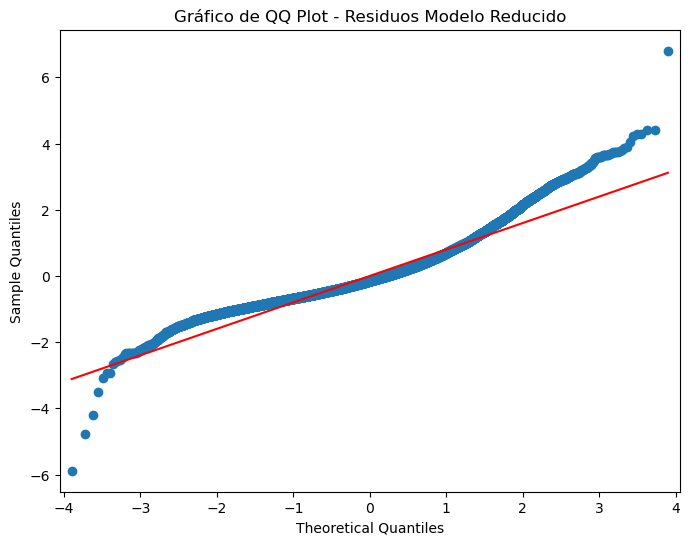

In [29]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot

#Residuos del modelo de regresión reducido

residuos = results.resid

# Gráfico QQ Plot 

fig, ax = plt.subplots(figsize=(8, 6))
qqplot(residuos, line='s', ax=ax)
ax.set_title('Gráfico de QQ Plot - Residuos Modelo Reducido')
plt.show()

**Análisis**

El supuesto de normalidad **no se cumple.**

A partir de la prueba realizada correspondiente a Shapiro Wilks, se rechaza la hipótesis nula que planteaba un comportamiento normal en la distribución de los errores. Adicionalmente, al analizar el gráfico Q-Q Plot, se observa que la mayoría de los cuantiles teóricos y observados para los términos de error no están alineados con la línea de referencia. Es decir, que es posible concluir que los términos de error del modelo propuesto no se distribuyen de forma normal.

**Prueba de MEDIA CERO:**

A través del One Sample T-Test se busca probar el supuesto de media cero en los errores, que plantea la siguiente prueba de hipótesis: 

- Ho: la media de los errores del modelo es cero
- H1: la media de los errores del modelo es distinta de cero

Para esta prueba específica, un p-value menor al nivel de significancia del 5% sugiere el rechazo de la hipótesis nula. 

In [30]:
# Prueba de One Sample T-Test

residuos = results.resid

t_statistic, p_valor = stats.ttest_1samp(residuos, 0)


print("Estadístico t:", t_statistic)
print("P-Value:", p_valor)

Estadístico t: -5.248960418002848e-13
P-Value: 0.9999999999995812


**Análisis**

El supuesto de media cero **se cumple.**

**Prueba de HOMOCEDASTICIDAD**

A través de la prueba de Breusch Pagan se busca probar el supuesto varianza constante en los errores, que plantea la siguiente prueba de hipótesis: 

- Ho: la varianza de los errores es constante (homocedasticidad)
- H1: la varianza de los errores no es constante (heterocedasticidad)

Para esta prueba específica, un p-value menor al nivel de significancia del 5% sugiere el rechazo de la hipótesis nula. 

In [31]:
#A través de este código se utiliza el método .exog que accede a la matriz de variables independientes del modelo

bp_test = sm.stats.diagnostic.het_breuschpagan(results.resid, results.model.exog)
print("Estadístico de prueba de Breusch-Pagan:", bp_test[0])
print("P-Value:", bp_test[1])

Estadístico de prueba de Breusch-Pagan: 623.6393984264932
P-Value: 1.576637626805709e-132


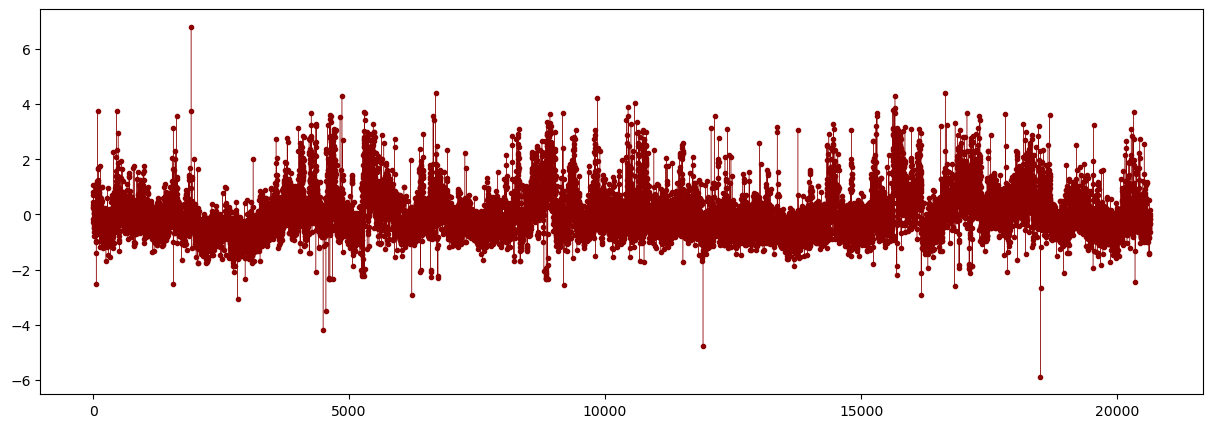

In [32]:
plt.figure(figsize=(15,5))
plt.plot(results.resid, '.-', color ="darkred", linewidth=0.3)
plt.show()

**Análisis**


A partir del resultado de la prueba de homocedasticidad, se obtuvo un valor lo suficientemente pequeño para rechazar la hipótesis nula, es decir, hay presencia de heterocedasticidad en los errores. Adicionalmente, en términos gráficos se puede concluir que el comportamiento de la variabilidad de los errores no es constante.

#### **3.5** Realice una detección de atípicos usando la distancia de Mahalanobis, eliminelos y vuelva a ajustar el modelo OLS, valide los supuestos del modelo.

Antes de empezar es relevante mencionar que la **Distancia de Mahalanobis** es una medida que se usar para calcular la distancia que exite entre una observación y un conjunto de observaciones tenendo en cuenta el comportamiento o información de la covarianza existente entre los datos. Normalmente, en el análisis multivariante tal como el que se está trabajando a lo largo de este documento se utiliza para detectar valores atípicos. 

Algunos puntos a destacar: 

- Al considerar la correlación entere las características esta metodología permite caputrar relaciones complejas entre las variables y evidencia una medida con una precisión más alta de la distancia entre observaciones en espacios de más de 2 dimensiones. 

- Dado lo anterior esta metodología permite calcular la distancia para cada observación en un conjunto de datos. Aquellos puntos que están más lejos de la distribución principal se consideran como valores atípicos. 

La distancia de Mahalanobis viene dada por la siguiente fórmula: 

D(x) = Raiz((x - μ)^T ⋅ Σ^-1 ⋅ (x - μ))

donde:

- x representa el vector de variables
- μ el vector de medias de las variables
- Σ matriz de covarianza de las variables
- Σ^-1 inversa de la matriz de covarianza
- D(x) corresponde a la distancia de Mahalanobis entre el punto x y la distribución definida por μ y 




In [33]:
'''Paso 1:


Para empezar debemos estandarizar las variables, debido a que inicialmente se hizo 
un cambio en la escala de la variable MedInc'''

from sklearn.preprocessing import StandardScaler

# Inicializar el objeto StandardScaler

scaler = StandardScaler()

# Aplicar la estandarización a las variables predictoras

X_estandarizado = scaler.fit_transform(df_X)

# Convertir el resultado en un nuevo DataFrame
df_X_estandarizado = pd.DataFrame(data=X_estandarizado, columns=df_X.columns)

df_X_estandarizado.head(5)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818


In [34]:
'''Paso 2:

Tenemos como objetivio analizar los atípicos en las variables predictoras,
por tanto, procedemos a sacar un vector que no considere las variables que previamente 
identificamos no deben ir en el modelo
'''

x= df_X_estandarizado.drop(["Longitude","Population","AveBedrms"], axis=1)
x

,MedInc,HouseAge,AveRooms,AveOccup,Latitude
0,2.344766,0.982143,0.628559,-0.049597,1.052548
1,2.332238,-0.607019,0.327041,-0.092512,1.043185
2,1.782699,1.856182,1.155620,-0.025843,1.038503
3,0.932968,1.856182,0.156966,-0.050329,1.038503
4,-0.012881,1.856182,0.344711,-0.085616,1.038503
...,...,...,...,...,...
20635,-1.216128,-0.289187,-0.155023,-0.049110,1.801647
20636,-0.691593,-0.845393,0.276881,0.005021,1.806329
20637,-1.142593,-0.924851,-0.090318,-0.071735,1.778237
20638,-1.054583,-0.845393,-0.040211,-0.091225,1.778237


In [35]:
'''Paso 3:

Para sacar las distancias se construye paso a paso los términos necesarios
para aplicar la formula de la distancia de Mahalanobis. En este paso, hayamos el
termino (x - μ)'''

centroide = x - x.mean()

Debido a que la distancia de Mahalanobis tiene en cuenta el comportamiento o más bien la información de la covarianza de las variables, es probable que se vea afectada por valores atípicos. Por tanto, para el siguiente paso es recomendable usar el Determinante de Covarianza Mínima que permite solucionar el problema de sensibilidad cuando hay presencia de valores atípicos. 

Este método, permite obtener una medida de distancia robusta en comparación con otras formas de estimar la matriz de covarianzas.

In [36]:
'''Paso 4:

En este paso calculamos la matriz de covarianza utilizando el Método de Determinante
de Covarianza Mínima'''

S = MinCovDet().fit(x) #Ajuste de modelo MCD a los datos
matriz_covarianza = S.covariance_ #Extracción de la matriz de covarianza robusta



In [37]:
'''Paso 5:

Invertimos la matriz de covarianza'''

inversa_cov = np.linalg.inv(matriz_covarianza)

In [38]:
'''Paso 6:

Ya teniendo todos los valores para calcular o usar la fórmula para la 
distancia de Mahalanobis, procedemos a realizar la aplicación de la misma'''


termino_derecho = np.dot(centroide, inversa_cov) # Σ^-1 ⋅ (x - μ)

termino_completo = np.dot(termino_derecho,centroide.T) # (x - μ)^T ⋅ Σ^-1 ⋅ (x - μ)

Distancia = np.sqrt(termino_completo.diagonal())


In [39]:
'''Paso 7:

En este punto se debe definir un nivel de significancia que viene determinado por
alpha para poder llevar a cabo la prueba de identificación de atípicos. 

Se calcula un valor crítico con la distribución chi cuadrado, y este valor se utiliza
como umbral para decidir si la observación es atípica o no.'''

alpha = 0.01
critico = np.sqrt(chi2.ppf(1-alpha, df = x.shape[1]))

print("Número de outliers: ", sum(Distancia > critico))

Número de outliers:  1576


Teniendo en cuenta el proceso anterior, donde a través de la distancia de Mahalanobis se identificaron los valores atípicos. Procedemos a construir un dataframe donde solamente tengamos en cuenta los valores no atípicos y de esta forma poder estimar un nuevo modelo por OLS.

In [40]:
df_X_estandarizado_new = df_X_estandarizado.drop(["Longitude","Population","AveBedrms"], axis=1).loc[Distancia <= critico, :]

df_Y_new = df_Y.loc[Distancia <= critico, :]

df_complete_new = pd.concat([df_X_estandarizado_new, df_Y_new], axis=1)

In [42]:
df_complete_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19065 entries, 0 to 20639
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MedInc              19065 non-null  float64
 1   HouseAge            19065 non-null  float64
 2   AveRooms            19065 non-null  float64
 3   AveOccup            19065 non-null  float64
 4   Latitude            19065 non-null  float64
 5   median_house_value  19065 non-null  float64
dtypes: float64(6)
memory usage: 1.0 MB


In [41]:
X_mahalanobis = df_complete_new.drop(["median_house_value"], axis=1)
y = df_complete_new["median_house_value"]


#Se añade una columna de 1's para poder tener el término independiente

X_mahalanobis = sm.add_constant(X_mahalanobis)

#Entrenamiento del modelo usando OLS 

model = sm.OLS(y,X_mahalanobis)
resultsmaha = model.fit()

#Resumen del modelo

print(resultsmaha.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     5418.
Date:                Thu, 16 May 2024   Prob (F-statistic):               0.00
Time:                        19:26:41   Log-Likelihood:                -20214.
No. Observations:               19064   AIC:                         4.044e+04
Df Residuals:                   19058   BIC:                         4.049e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9629      0.005    367.344      0.0

**Evaluación de los supuestos**

**Prueba de INDEPENDENCIA:**

- Ho: no hay autocorrelación de los errores del modelo 
- H1: existe autocorrelación entre los errores del modelo



In [42]:
# Calcular el estadístico de Durbin-Watson
durbin_watson_statistic = sm.stats.stattools.durbin_watson(resultsmaha.resid)

# Mostrar el resultado
print("Estadístico de Durbin-Watson:", durbin_watson_statistic)

Estadístico de Durbin-Watson: 0.9935471204553786


**Análisis** 

El supuesto de independencia **no se cumple.**

Según el estadístico obtenido, es posible que exista autocorrelación positiva entre los errores (0.9).

**Prueba de NORMALIDAD:**

A través del Test de Shapiro Wilks se busca probar el supuesto de normalidad, que plantea la siguiente prueba de hipótesis: 

- Ho: los residuos del modelo siguen una distribución normal
- H1: los residuos del modelo no siguen una distribución normal

Para esta prueba específica, un p-value menor al nivel de significancia del 5% sugiere el rechazo de la hipótesis nula.

In [43]:
shapiro_test_statistic, shapiro_p_value = stats.shapiro(resultsmaha.resid)
print("Estadístico de prueba para Shapiro Wilks: ", shapiro_test_statistic)
print("P-Value: ", shapiro_p_value)

Estadístico de prueba para Shapiro Wilks:  0.9586130380630493
P-Value:  0.0


c:\Users\monte\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


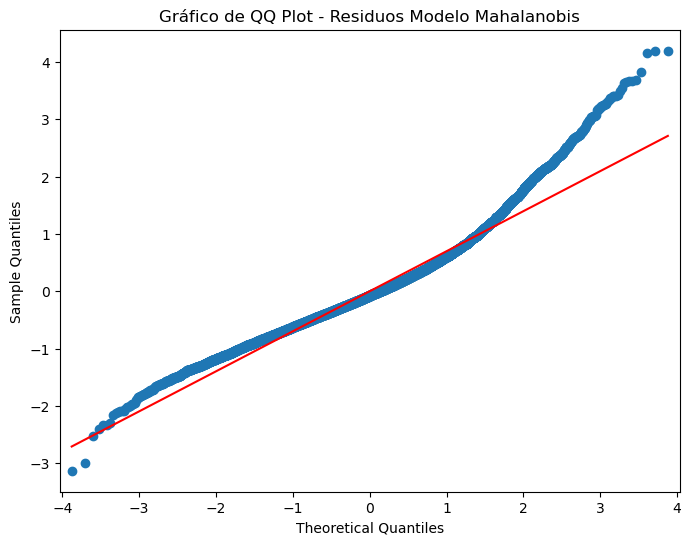

In [44]:
#Residuos del modelo de regresión después de aplicar mahalanobis

residuos = resultsmaha.resid

# Gráfico QQ Plot 

fig, ax = plt.subplots(figsize=(8, 6))
qqplot(residuos, line='s', ax=ax)
ax.set_title('Gráfico de QQ Plot - Residuos Modelo Mahalanobis')
plt.show()

**Análisis**

El supuesto de normalidad **no se cumple.**


**Prueba de MEDIA CERO:**

A través del One Sample T-Test se busca probar el supuesto de media cero en los errores, que plantea la siguiente prueba de hipótesis: 

- Ho: la media de los errores del modelo es cero
- H1: la media de los errores del modelo es distinta de cero

Para esta prueba específica, un p-value menor al nivel de significancia del 5% sugiere el rechazo de la hipótesis nula. 

In [45]:
# Prueba de One Sample T-Test

residuos = resultsmaha.resid

t_statistic, p_valor = stats.ttest_1samp(residuos, 0)


print("Estadístico t:", t_statistic)
print("P-Value:", p_valor)

Estadístico t: -3.3881877771415246e-14
P-Value: 0.9999999999999729


**Análisis**

El supuesto de media cero **se cumple.**

**Prueba de HOMOCEDASTICIDAD**

A través de la prueba de Breusch Pagan se busca probar el supuesto varianza constante en los errores, que plantea la siguiente prueba de hipótesis: 

- Ho: la varianza de los errores es constante (homocedasticidad)
- H1: la varianza de los errores no es constante (heterocedasticidad)

Para esta prueba específica, un p-value menor al nivel de significancia del 5% sugiere el rechazo de la hipótesis nula. 

In [46]:
#A través de este código se utiliza el método .exog que accede a la matriz de variables independientes del modelo

bp_test = sm.stats.diagnostic.het_breuschpagan(resultsmaha.resid, resultsmaha.model.exog)
print("Estadístico de prueba de Breusch-Pagan:", bp_test[0])
print("P-Value:", bp_test[1])

Estadístico de prueba de Breusch-Pagan: 945.8847404459143
P-Value: 3.1166726001270915e-202


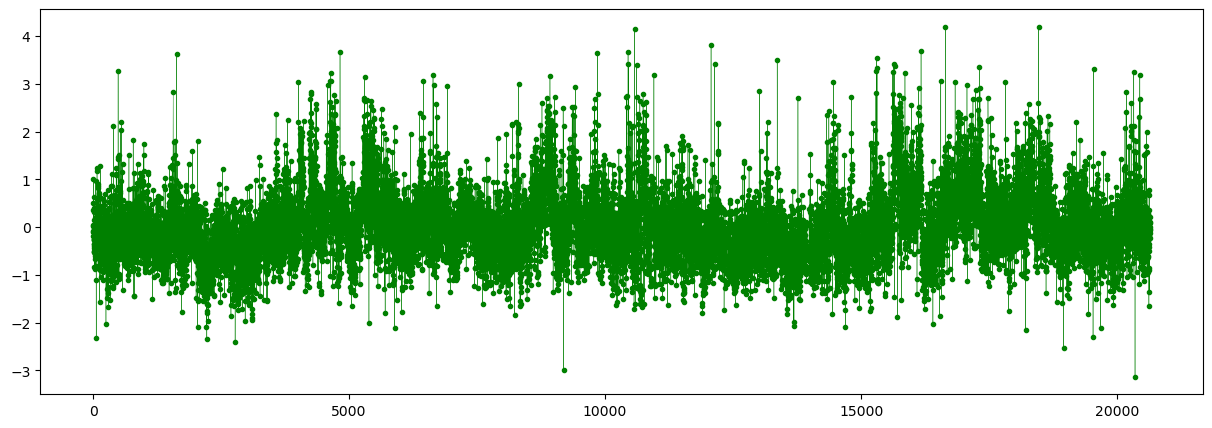

In [47]:
plt.figure(figsize=(15,5))
plt.plot(resultsmaha.resid, '.-', color ="green", linewidth=0.3)
plt.show()

**Análisis**

El supuesto de homocedasticidad **no se cumple.**

**Conclusión general** 

Durante el desarrollo de este ejercicio, se emplearon diversas técnicas con el propósito de alcanzar el modelo más idóneo para estimar el valor medio de la vivienda para los distritos de California.

A pesar de haber aplicado el modelo LASSO, que facilitó la selección de las variables más pertinentes para la estimación y abordó el problema de la multicolinealidad, no se logró garantizar el cumplimiento de los supuestos de los errores del modelo. Esto sugiere que es probable que aún estén siendo omitidas variables relevantes que son determinantes para explicar la variable objetivo.

Por otro lado, mediante la metodología de Mahalanobis, se pudieron identificar un total de 1.576 valores atípicos que no se consideraron en la última estimación. Sin embargo, este enfoque tampoco aseguró el cumplimiento de los supuestos de los errores.

Es posible concluir que, para resolver el problema en cuestión, es relevante reconsiderar la estructura del modelo, incluyendo posibles variables importantes que no están siendo tenidas en cuenta para explicar el valor de las viviendas, o evaluar transformaciones adicionales de los datos que puedan conducir a una estimación que cumpla con los supuestos del modelo.